In [16]:
import sys
sys.path.append(r"../../utils")
import numpy as np 
import pandas as pd
from questions_columns import sci_af_ca, suicidal_behavior, c_ssrs, sci_father, sci_mother, scs_stu, scs_clin, suicidal_ideation, siq, sdq,c_ssrs_intake, mfq, scared, ATHENS, SAS
from utils import simple_eda, impute_from_column
from questionnaires_aggregation import c_ssrs_aggregation, c_ssrs_intake_aggregation, sci_af_ac_aggregation

c_ssrs = c_ssrs[:-2]

In [17]:
info_columns = ['id', 'gender', 'redcap_event_name', 'age_child_pre']
all_columns = set(suicidal_behavior + suicidal_ideation + info_columns + sci_af_ca + siq + sdq + c_ssrs_intake + c_ssrs + mfq + scared + ATHENS + SAS + scs_clin + sci_mother)
all_columns_ordered = info_columns + c_ssrs_intake + c_ssrs + sci_af_ca + scs_clin + sci_mother + siq + sdq + mfq + scared + ATHENS + SAS + suicidal_behavior + suicidal_ideation
id_column = 'id'
df = pd.read_csv(r'../../creating_the_clinic_dataset/preprocessed_data/merged_2021_and_2022.csv', na_values = ' ')

C:\Users\nogur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,44,50,73,84,309,437,442,443,450,457,486,502,540,549,568,728,733,745,747,752,763,801,810,829,882,883,884,885,886,887,888,889,890,891,892,951,989,994,1000,1015,1045,1065,1066,1070,1071,1072,1073,1075,1076,1077,1080,1081,1098,1103,1119,1121,1172,1174,1193,1195,1196,1197,1203,1204,1205,1206,1358,1360,1361,1362,1368,1369,1370,1371,1486,1492,1493,1496,1497,1498,1499,1508,1516,1532,1535,1546) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df = df.query("redcap_event_name == 'intake_arm_1'")

In [21]:
(df['therapy_child'] == 1).sum()

95

In [22]:
(df['therapy_child'] == 2).sum()

67

In [23]:
(df['therapy_child'].isna()).sum()

246

In [26]:
df.id.nunique() == 246+67+95

True

In [24]:
95 / (95+67)

0.5864197530864198

In [6]:
clin_life = ['c_ssrs_t_life_1_clin',
'c_ssrs_t_life_2_clin',
'c_ssrs_t_life_3_clin',
'c_ssrs_t_life_4_clin',
'c_ssrs_t_life_5_clin',]

In [11]:
df[scs_clin]

,sci_c_1_1_clin,scs_2_1_clin,scs_2_2_clin,scs_2_3_clin,scs_2_4_clin,sci_c_3_1_clin,sci_c_3_2_clin,sci_c_3_3_clin,sci_c_3_4_clin,sci_c_4_1_clin,sci_c_4_2_clin,sci_c_4_3_clin,sci_c_4_4_clin,sci_c_5_1_clin,sci_c_5_2_clin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sci_p_columns = [i[:-1] for i in sci_father]
for column_name in sci_p_columns:
    df = impute_from_column(df, impute_to = f"{column_name}m", impute_from = f'{column_name}f')


In [4]:
sci_clin_columns = [i[:-4] for i in scs_clin]

for column_name in sci_clin_columns:
    df = impute_from_column(df, impute_to = f"{column_name}clin", impute_from = f'{column_name}stu')


In [5]:
df_intake = df[df.redcap_event_name == 'intake_arm_1'][all_columns]
df_5weeks = df[df.redcap_event_name == 'control_5weeks_arm_1'][all_columns]
df_pre = df[df.redcap_event_name == 'pre_treatment_arm_1'][all_columns]
df_3months = df[df.redcap_event_name == 'followup_3month_arm_1'][all_columns]

In [6]:
all_columns.remove('id')
df_pre_5weeks = pd.merge(df_5weeks, df_pre, on=['id'], how='outer', suffixes=('', '_treatment_arm_1'))

for column_name in all_columns:
    df_pre_5weeks = impute_from_column(df_pre_5weeks, impute_to = column_name, impute_from = f'{column_name}_treatment_arm_1')

    
    
five_weeks_cols = [i for i in df_pre_5weeks.columns if i.endswith('_treatment_arm_1')]
df_pre_5weeks = df_pre_5weeks.drop(five_weeks_cols, axis=1)

In [7]:
df_time2 = pd.merge(df_pre_5weeks, df_3months, on=['id'], how='outer', suffixes=('', '_followup_3month_arm_1'))


for column_name in all_columns:
    df_time2 = impute_from_column(df_time2, impute_to = column_name, impute_from = f'{column_name}_followup_3month_arm_1')

    
    
followup_3month_cols = [i for i in df_time2.columns if i.endswith('_followup_3month_arm_1')]
df_time2 = df_time2.drop(followup_3month_cols, axis=1)

In [8]:
df_intake['measurement'] = 'time1'
df_time2['measurement'] = 'time2'

In [9]:
output_df = pd.concat([df_intake, df_time2])

In [10]:
output_df = impute_from_column(output_df, impute_to = 'c_ssrs_6', impute_from = 'c_ssrs_last_visit_6')
output_df.loc[output_df[~ output_df[c_ssrs].isna().all(axis=1)].index, c_ssrs] = 0
output_df[suicidal_behavior] = output_df[suicidal_behavior].replace(2, 0)
output_df[suicidal_ideation] = output_df[suicidal_ideation].replace(2, 0)

output_df = output_df[list(all_columns) + ['id', 'measurement']]

output_df.to_csv("data_for_prediction_task - measurement time axis.csv", index=False)

In [11]:

missing_sci_af_ca = [f'sci_af_ca_{i}' for i in range(26,41)]
output_df, sci_af_ac_factors = sci_af_ac_aggregation(output_df)

output_df['is_sci_af_ca_missing'] = output_df[missing_sci_af_ca].isna().all(axis=1)




output_df['mfq_sum'] = output_df[mfq].sum(axis=1, skipna=False)

for time in ['life', '2weeks', 'recent']:
    for severity in ['stb', 'idea']:
        agg_column = f'c_ssrs_intake_{time}_{severity}'
        output_df[agg_column] = c_ssrs_intake_aggregation(output_df, severity = severity, time = time)
        
        
output_df['siq_sum'] = output_df[siq].sum(axis=1, skipna=False)

output_df['sdq_sum'] = output_df[sdq].sum(axis=1, skipna=False)


df_intake = output_df[output_df.measurement == 'time1'][all_columns_ordered]
df_target = output_df[output_df.measurement == 'time2'][all_columns_ordered]

df_target['suicidal_behavior_time2'] = (df_target[suicidal_behavior].sum(axis=1) > 0).astype(int)
df_target['suicidal_ideation_time2'] = (df_target[suicidal_ideation].sum(axis=1) > 0).astype(int)


merged_times = pd.merge(df_intake, df_target, on='id', how='outer', suffixes=('_time1', '_time2'))


C:\Users\nogur\AppData\Local\Temp/ipykernel_20472/437420288.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  output_df['suicidal_behavior'] = (output_df[suicidal_behavior].sum(axis=1) > 0).astype(int)
C:\Users\nogur\AppData\Local\Temp/ipykernel_20472/437420288.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  output_df['suicidal_ideation'] = (output_df[suicidal_ideation].sum(axis=1) > 0).astype(int)


In [13]:
merged_times.to_csv("data_for_prediction_task- single_patient_axis.csv", index=False)

C:\Users\nogur\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\nogur\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:55: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'Data must be 1-dimensional')
  warnings.warn(
C:\Users\nogur\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:55: UserWarning: There was an attempt to calculate the phi_k correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"phi_k": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The truth value of a Series is ambiguous

ValueError: Grouper for 'c_ssrs_1_time1' not 1-dimensional

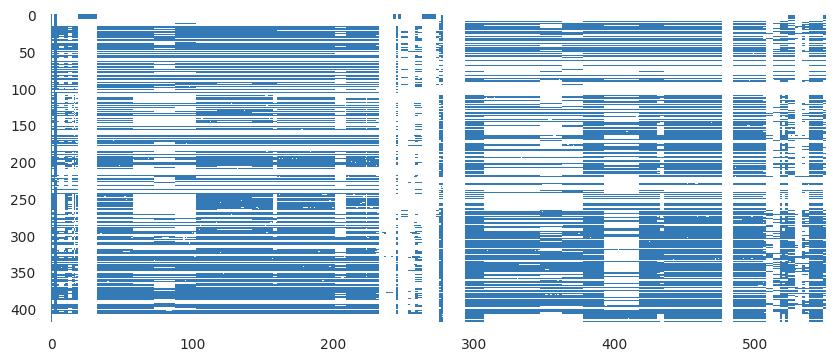

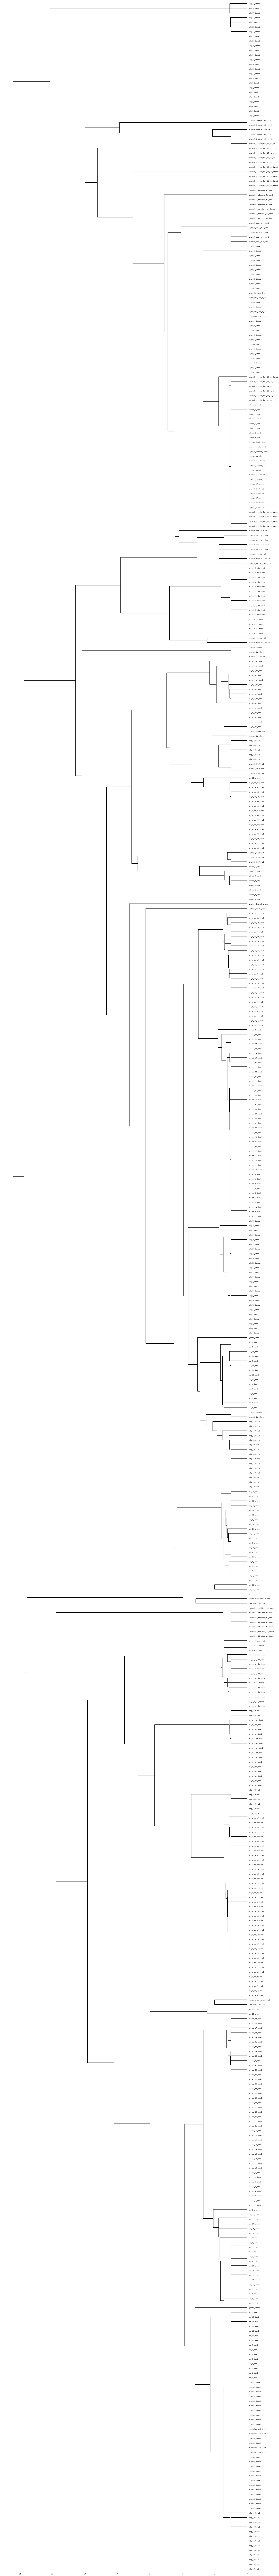

In [14]:
eda = True
if eda:
    simple_eda(merged_times, columns = list(merged_times.columns), title = 'generic_data_for_prediction_task', display_additional_columns=False)